# Going a Step Beyond using Support Vector Machines

## Kernel exemplification

In [1]:
import numpy as np

X = np.array([[1, 2, 3], [3, 2, 1]])


def poly_expansion(A):
    return np.array([[x * y for x in
                      row for y in row] for row in A])


In [2]:
poly_X = poly_expansion(X)

print ('\nDimensions after expanding: %s' % str(poly_X.shape))
print ("\npoly_X:\n", poly_X)


Dimensions after expanding: (2, 9)

poly_X:
 [[1 2 3 2 4 6 3 6 9]
 [9 6 3 6 4 2 3 2 1]]


In [3]:
np.dot(poly_X[0],poly_X[1])

100

In [4]:
def poly_kernel(a, b):
    return np.sum(a * b) ** 2


poly_kernel(X[0], X[1])


100

## Numpy array multiplication

```py
np.sum(a * b) ** 2
```

This is performing an element-wise multiplication between two numpy arrays `a` and `b`.

Then it calculates the sum of the resulting array.

Finally, it takes the square of the sum.

This code snippet uses the `np.sum()` function to calculate the sum of the product of corresponding elements of `a` and `b`. The resulting scalar is then squared using the `**` operator.

This is essentially equivalent to the following mathematical expression:

```py
(sum_i(a_i * b_i))^2
```

where `a_i` and `b_i` are the elements of the arrays `a` and `b` respectively.

`sum_i` denotes the summation over all the elements in the arrays.

### Note:

The multiplication is performed element-wise, because `a` and `b` are numpy arrays.

The `*` operator for numpy arrays performs element-wise multiplication.

## When might we do such a thing?

### When calculating the similarity between two feature vectors.

In general, this expression calculates the square of the dot product of the vectors represented by the numpy arrays `a` and `b`.

The dot product is a mathematical operation that takes two vectors of equal length and returns a scalar. It is defined as the sum of the product of corresponding elements of the two vectors. In other words, the dot product of two vectors `a` and `b` of length `n` is:

```css
a . b = sum_i=1_to_n (a_i * b_i)
```

Taking the square of the dot product has various uses, such as:

1. Calculating the magnitude of a vector
2. Computing the cosine similarity between two vectors

Therefore, the expression `np.sum(a * b) ** 2` might be used in various applications that involve calculating the square of the dot product of two vectors represented by numpy arrays `a` and `b`.

For example, it could be used in machine learning algorithms that involve **calculating the similarity between two feature vectors**, or in signal processing applications that involve calculating the correlation between two signals.

<br>


# Classifying handwritten digits

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_digits
import numpy as np
import random

digits = load_digits()
X, y = digits.data, digits.target


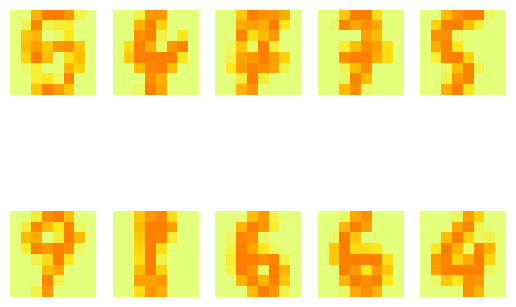

In [6]:
random_examples = [random.randint(0, len(digits.images))
                   for i in range(10)]

for n, number in enumerate(random_examples):
    plt.subplot(2, 5, n + 1)
    # cmap='binary'
    plt.imshow(digits.images[number], cmap='Wistia',
               interpolation='none', extent=[0, 8, 0, 8])
    plt.grid()
    plt.axis(False)

plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

# We keep 30% random examples for test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=0.3, random_state=101)
# We scale the data in the range [-1,1]
scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)

X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)


In [8]:
from sklearn.svm import SVC

svm = SVC()
cv_performance = cross_val_score(svm, X_train, y_train, cv=10)
test_performance = svm.fit(X_train, y_train).score(X_test, y_test)

print('\nCross-validation accuracy score: %0.3f, test accuracy score: %0.3f' %
      (np.mean(cv_performance), test_performance))



Cross-validation accuracy score: 0.986, test accuracy score: 0.987


In [9]:
# HELLO! This one takes a long time to run.
import numpy as np
from sklearn.model_selection import GridSearchCV

learning_algo = SVC(kernel='linear', random_state=101)

search_space = [{'kernel': ['linear'],
                 'C': np.logspace(-3, 3, 7)},
                {'kernel': ['rbf'],
                 'C': np.logspace(-3, 3, 7),
                 'gamma': np.logspace(-3, 2, 6)}]

gridsearch = GridSearchCV(learning_algo,
                          param_grid=search_space,
                          refit=True, cv=10)

gridsearch.fit(X_train, y_train)

print('\nBest parameter: %s' % str(gridsearch.best_params_))
cv_performance = gridsearch.best_score_
test_performance = gridsearch.score(X_test, y_test)

print('\nCross-validation accuracy score: %0.3f, test accuracy score: %0.3f' %
      (cv_performance, test_performance))



Best parameter: {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}

Cross-validation accuracy score: 0.988, test accuracy score: 0.987


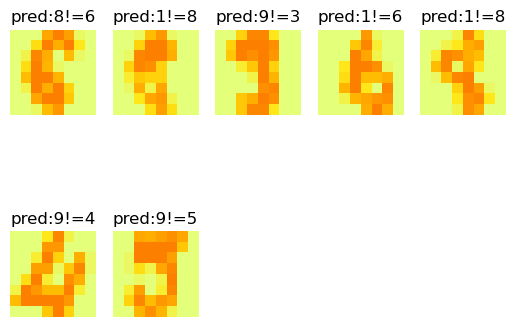

In [11]:
prediction = gridsearch.predict(X_test)
wrong_prediction = (prediction != y_test)
test_digits = scaling.inverse_transform(X_test)

# Plot the wrong predictions
for n, (number, yp, yt) in enumerate(zip(
    scaling.inverse_transform(X_test)[wrong_prediction],
    prediction[wrong_prediction],
    y_test[wrong_prediction])):

    plt.subplot(2, 5, n + 1)

    # cmap='binary'
    plt.imshow(number.reshape((8, 8)), cmap='Wistia',
               interpolation='none',
               extent=[0, 8, 0, 8])

    plt.title('pred:' + str(yp) + "!=" + str(yt))
    plt.grid()
    plt.axis(False)

plt.show()
